In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web

本次作業使用Kaggle上，預測「鐵達尼號存活率」的，非常經典的例子，請先下載本檔案做使用，需要把這個檔案放在跟 jupyter notebook同一個資料夾才讀取的到

我們今天的目標，是利用其中的「性別 Sex」跟「年齡 Age」來預測「存活與否 Survived」(1是存活，0則否）。

1.首先，請使用pandas套件讀檔

2.請取出所有的Age跟Sex作為題目，和Survived做為答案並分成三個同名的numpy array。 (提示： Age.shape = (891, ))

3.其中，由於Age有一些值是空值NaN，請把這些空值都先換成0。提示： 可使用 np.isnan(某個你想確認是不是NaN的年齡) ）

4.再來，Sex部分因為都是文字，不方便我們做svm，請把Male都換成0，Female都換成1 

5.由於我們想把Sex跟Age都當成data，請把Sex和Age兩個array合併成一個。（提示：先用np.reshape，再用np.append）

6.實際拿svm 訓練看看，並用同樣的data，preict看看結果（這次不用分training data跟testing data）

#### step1. 首先，請使用pandas套件讀檔

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### step2. 請取出所有的Age跟Sex作為題目，和Survived做為答案並分成三個同名的numpy array。

In [4]:
Age = np.array(df['Age'])
Sex = np.array(df['Sex'])
Survived = np.array(df['Survived'])

In [5]:
Age = Age.reshape(891, 1)

#### step3. 其中，由於Age有一些值是空值NaN，請把這些空值都先換成0。

In [6]:
Age[np.isnan(Age)] = 0

#### step4. 再來，Sex部分因為都是文字，不方便我們做svm，請把Male都換成0，Female都換成1。

In [7]:
Sex[Sex == 'male'] = 0
Sex[Sex == 'female'] = 1

#### step5. 由於我們想把Sex跟Age都當成data，請把Sex和Age兩個array合併成一個。

In [8]:
Age = Age.reshape(891, 1)
Sex = Sex.reshape(891, 1)

In [9]:
data = np.append(Sex, Age, axis=1)

#### step6. 實際拿svm 訓練看看，並用同樣的data，preict看看結果

In [10]:
from sklearn.svm import SVC

In [11]:
clf = SVC(gamma = 'auto')

In [12]:
clf.fit(data, Survived)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
predict = clf.predict(data)

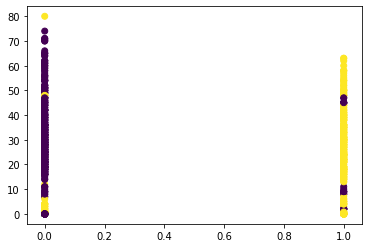

In [14]:
plt.scatter(data[:, 0], data[:, 1], c = predict)